In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Suicidal_redit.csv')

In [3]:
print(dataset)

                                                   Title  \
0      I'm looking for a girl I've met at the Polish ...   
1        I got a guy kicked off a domestic flight today.   
2      My youngest got in school suspension, Im so pr...   
3      I'm a cashier who switched from "sir/mam" to "...   
4      My whole class complimented me and didnt reali...   
...                                                  ...   
15471              Once I die, I can finally be at rest.   
15472                               I just want to stop.   
15473                                     Im still alive   
15474                I'm lonely but I can't stand people   
15475                       I dont even recognize myself   

                                                    Post         Label  
0      I've tried Polish spotted pages but I guess sh...  Non-Suicidal  
1      I was in a forward row as we were boarding for...  Non-Suicidal  
2      So according to witness testimonies a boy grab...  No

In [4]:
import re
import nltk 
nltk.download('stopwords') #These are words which are 'the','a' etc not helping in getting sentiment
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prafu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
dataset['text'] = dataset['Title'] + " " + dataset['Post'] 
dataset = dataset[['text', 'Label']]

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
corpus = []
for i in range(0,15000):
    text = X[i] 
    if isinstance(text, float): 
        text = "" 
    review = re.sub('[^a-zA-Z]',' ', str(text))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    filter_review = []
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    for word in review:
        if not word in set(all_stopwords):
            filter_review.append(ps.stem(word))

    filter_review = ' '.join(filter_review)
    corpus.append(filter_review)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_features = vectorizer.fit_transform(corpus).toarray()

In [9]:
print(y)

['Non-Suicidal' 'Non-Suicidal' 'Non-Suicidal' ... 'Suicidal' 'Suicidal'
 'Suicidal']


In [10]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
y = lc.fit_transform(y)

In [13]:
print(len(y))

15476


In [14]:
y = y[:15000]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1807
           1       0.78      0.92      0.84      1193

    accuracy                           0.87      3000
   macro avg       0.86      0.87      0.86      3000
weighted avg       0.88      0.87      0.87      3000



0.866


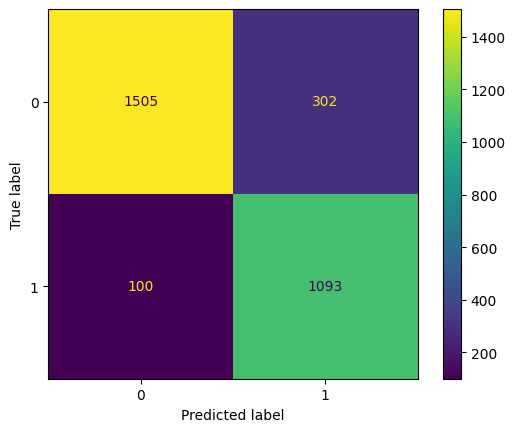

In [20]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(y_pred, y_test))

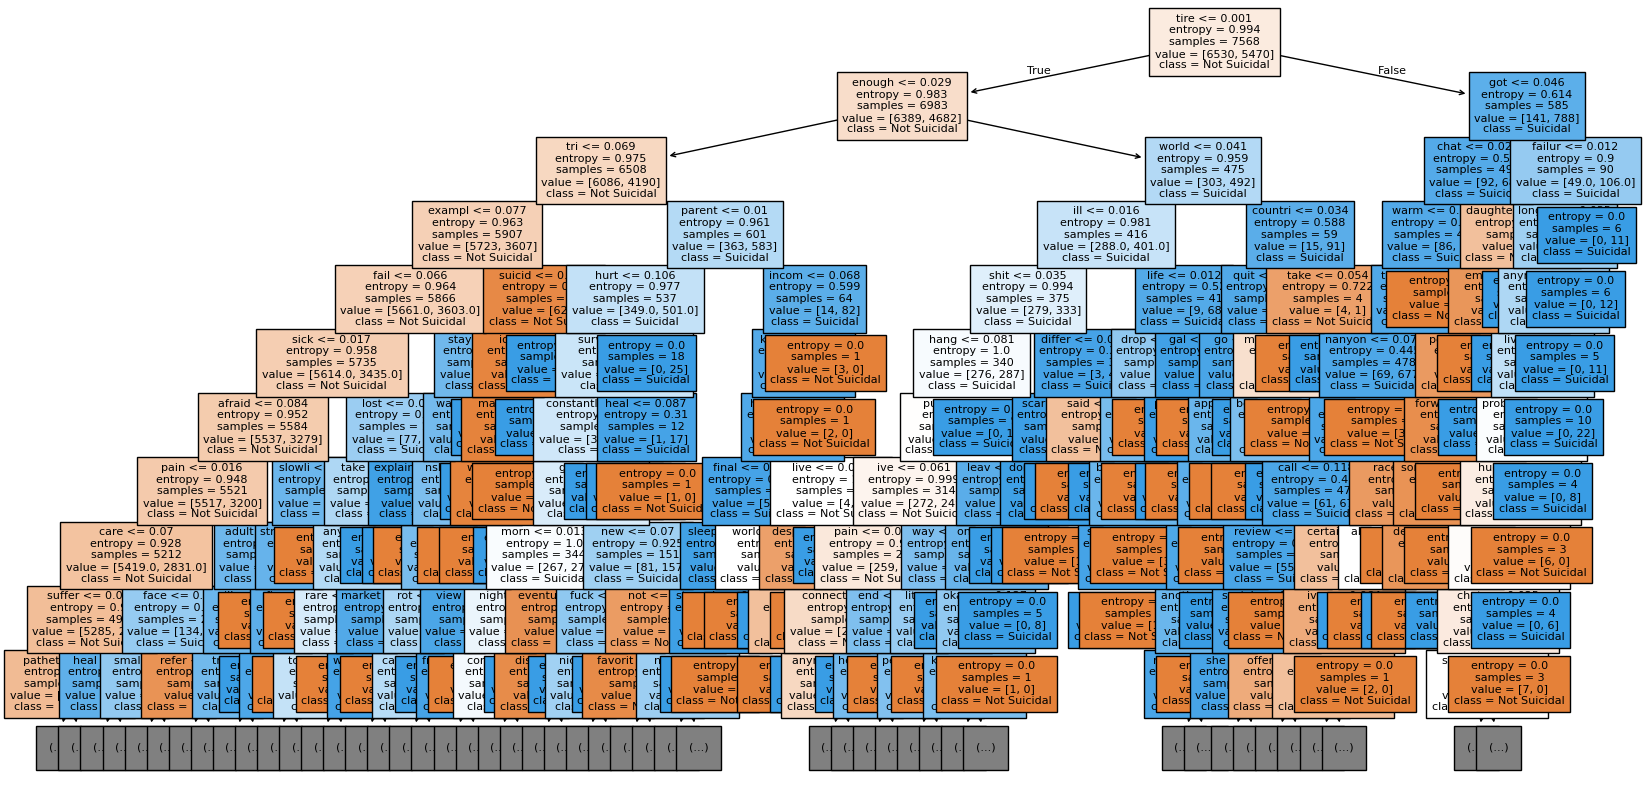

In [27]:
estimator = classifier.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          max_depth = 10,
          filled=True,
          fontsize=8,
          feature_names=vectorizer.get_feature_names_out(),
          class_names=["Not Suicidal", "Suicidal"])
plt.show()